<a href="https://colab.research.google.com/github/tathagatanandy/networktraffic/blob/main/Gaussian_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Default title text
import pandas as pd

In [ ]:
ls

gdrive/  sample_data/


In [ ]:
pwd

'/content'

In [ ]:
## If you are using the data by mounting the google drive, use the following : If not using Google drive , please comment this
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

# Import the os module
import os

# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Change the current working directory
os.chdir('/content/gdrive/MyDrive/upgrad-assignment/MSLJMU')

# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))


Current working directory: /content
Current working directory: /content/gdrive/MyDrive/upgrad-assignment/MSLJMU


In [ ]:
data= pd.read_csv("App-data-87.csv")
data

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,192.168.90.114-10.200.7.5-59240-3128-6,10.200.7.5,3128,192.168.90.114,59240,6,27/04/201711:34:51,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
1048571,192.168.42.57-10.200.7.5-62632-3128-6,10.200.7.5,3128,192.168.42.57,62632,6,27/04/201711:33:43,74700026,12,1,...,0.0,138,138.0,45000538.0,0.0,45000538.0,45000538.0,BENIGN,7,HTTP
1048572,192.168.90.70-10.200.7.5-52166-3128-6,10.200.7.5,3128,192.168.90.70,52166,6,27/04/201711:32:47,76789744,19,2,...,0.0,9299,9299.0,76770550.0,0.0,76770550.0,76770550.0,BENIGN,131,HTTP_PROXY
1048573,192.168.180.14-10.200.7.5-34478-3128-6,10.200.7.5,3128,192.168.180.14,34478,6,27/04/201711:35:00,535002,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP


In [ ]:
## Lets analyze the flow data
for col in data.columns:
    print(col)

Flow.ID
Source.IP
Source.Port
Destination.IP
Destination.Port
Protocol
Timestamp
Flow.Duration
Total.Fwd.Packets
Total.Backward.Packets
Total.Length.of.Fwd.Packets
Total.Length.of.Bwd.Packets
Fwd.Packet.Length.Max
Fwd.Packet.Length.Min
Fwd.Packet.Length.Mean
Fwd.Packet.Length.Std
Bwd.Packet.Length.Max
Bwd.Packet.Length.Min
Bwd.Packet.Length.Mean
Bwd.Packet.Length.Std
Flow.Bytes.s
Flow.Packets.s
Flow.IAT.Mean
Flow.IAT.Std
Flow.IAT.Max
Flow.IAT.Min
Fwd.IAT.Total
Fwd.IAT.Mean
Fwd.IAT.Std
Fwd.IAT.Max
Fwd.IAT.Min
Bwd.IAT.Total
Bwd.IAT.Mean
Bwd.IAT.Std
Bwd.IAT.Max
Bwd.IAT.Min
Fwd.PSH.Flags
Bwd.PSH.Flags
Fwd.URG.Flags
Bwd.URG.Flags
Fwd.Header.Length
Bwd.Header.Length
Fwd.Packets.s
Bwd.Packets.s
Min.Packet.Length
Max.Packet.Length
Packet.Length.Mean
Packet.Length.Std
Packet.Length.Variance
FIN.Flag.Count
SYN.Flag.Count
RST.Flag.Count
PSH.Flag.Count
ACK.Flag.Count
URG.Flag.Count
CWE.Flag.Count
ECE.Flag.Count
Down.Up.Ratio
Average.Packet.Size
Avg.Fwd.Segment.Size
Avg.Bwd.Segment.Size
Fwd.Header.

In [ ]:
import sklearn

In [ ]:
print(sklearn.__version__)

1.2.2


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [ ]:
 data

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,192.168.90.114-10.200.7.5-59240-3128-6,10.200.7.5,3128,192.168.90.114,59240,6,27/04/201711:34:51,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
1048571,192.168.42.57-10.200.7.5-62632-3128-6,10.200.7.5,3128,192.168.42.57,62632,6,27/04/201711:33:43,74700026,12,1,...,0.0,138,138.0,45000538.0,0.0,45000538.0,45000538.0,BENIGN,7,HTTP
1048572,192.168.90.70-10.200.7.5-52166-3128-6,10.200.7.5,3128,192.168.90.70,52166,6,27/04/201711:32:47,76789744,19,2,...,0.0,9299,9299.0,76770550.0,0.0,76770550.0,76770550.0,BENIGN,131,HTTP_PROXY
1048573,192.168.180.14-10.200.7.5-34478-3128-6,10.200.7.5,3128,192.168.180.14,34478,6,27/04/201711:35:00,535002,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP


In [ ]:
## Make the Dst Port as the Smaller value as Ephieral ports are always the larger  values
data= pd.read_csv("App-data-87.csv")
s = data['Destination.Port'] > data['Source.Port']
data.loc[s, ['Source.IP','Destination.IP']] = data.loc[s, ['Destination.IP','Source.IP']].values
data.loc[s, ['Destination.Port','Source.Port']] = data.loc[s, ['Source.Port','Destination.Port']].values

In [ ]:
data

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,10.200.7.217,38848,50.31.185.39,80,6,26/04/201711:11:17,1,3,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,10.200.7.217,38848,50.31.185.39,80,6,26/04/201711:11:17,217,1,3,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,192.168.90.114-10.200.7.5-59240-3128-6,192.168.90.114,59240,10.200.7.5,3128,6,27/04/201711:34:51,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
1048571,192.168.42.57-10.200.7.5-62632-3128-6,192.168.42.57,62632,10.200.7.5,3128,6,27/04/201711:33:43,74700026,12,1,...,0.0,138,138.0,45000538.0,0.0,45000538.0,45000538.0,BENIGN,7,HTTP
1048572,192.168.90.70-10.200.7.5-52166-3128-6,192.168.90.70,52166,10.200.7.5,3128,6,27/04/201711:32:47,76789744,19,2,...,0.0,9299,9299.0,76770550.0,0.0,76770550.0,76770550.0,BENIGN,131,HTTP_PROXY
1048573,192.168.180.14-10.200.7.5-34478-3128-6,192.168.180.14,34478,10.200.7.5,3128,6,27/04/201711:35:00,535002,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP


In [ ]:
#convert the Source and Destination IP to numeric
import ipaddress
data['Source.IP'] = data['Source.IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
data['Destination.IP'] = data['Destination.IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))



In [ ]:
#print(data['int_network'])
print(data['Source.IP'])
print(data['Destination.IP'])



0          2886926638
1          2886926638
2           180881369
3           180881369
4          3232253995
              ...    
1048570    3232258674
1048571    3232246329
1048572    3232258630
1048573    3232281614
1048574    3232281614
Name: Source.IP, Length: 1048575, dtype: int64
0          180881159
1          180881159
2          840939815
3          840939815
4          180881159
             ...    
1048570    180881157
1048571    180881157
1048572    180881157
1048573    180881157
1048574    180881157
Name: Destination.IP, Length: 1048575, dtype: int64


# Drop Unwanted Columns

In [ ]:
data = data.drop('Label', axis=1)



In [ ]:
data

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,2886926638,52422,180881159,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,2886926638,52422,180881159,3128,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,180881369,38848,840939815,80,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,180881369,38848,840939815,80,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,3232253995,55961,180881159,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,192.168.90.114-10.200.7.5-59240-3128-6,3232258674,59240,180881157,3128,6,27/04/201711:34:51,1,2,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,7,HTTP
1048571,192.168.42.57-10.200.7.5-62632-3128-6,3232246329,62632,180881157,3128,6,27/04/201711:33:43,74700026,12,1,...,138.0,0.0,138,138.0,45000538.0,0.0,45000538.0,45000538.0,7,HTTP
1048572,192.168.90.70-10.200.7.5-52166-3128-6,3232258630,52166,180881157,3128,6,27/04/201711:32:47,76789744,19,2,...,9299.0,0.0,9299,9299.0,76770550.0,0.0,76770550.0,76770550.0,131,HTTP_PROXY
1048573,192.168.180.14-10.200.7.5-34478-3128-6,3232281614,34478,180881157,3128,6,27/04/201711:35:00,535002,2,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,7,HTTP


In [ ]:
data = data.drop('Timestamp', axis=1)

In [ ]:
data = data.drop('ProtocolName', axis=1)


In [ ]:

data= data.drop('Fwd.Avg.Bytes.Bulk',axis =1)
data= data.drop('Fwd.Avg.Packets.Bulk',axis =1)
data= data.drop('Fwd.Avg.Bulk.Rate',axis =1)
data= data.drop('Bwd.Avg.Bytes.Bulk',axis =1)
data= data.drop('Bwd.Avg.Packets.Bulk',axis =1)
data= data.drop('Bwd.Avg.Bulk.Rate',axis =1)
data= data.drop('CWE.Flag.Count',axis =1)

data= data.drop('Bwd.PSH.Flags',axis =1)
data= data.drop('Fwd.URG.Flags',axis =1)
data= data.drop('Bwd.URG.Flags',axis =1)



In [ ]:
#df = pd.DataFrame(data)

# Group by 'Category' and calculate mean for 'Value1' and sum for 'Value2'
#result = df.groupby('Category').agg({'Value1': 'mean', 'Value2': 'sum'})

#result = data.groupby('Flow.id').agg({'Value1': 'mean', 'Value2': 'sum'})

In [ ]:
# There are multiple columns with the Same ID.. We need to merge them to a Single Row with other values as average 
## of all the Same columns

data1 = data.groupby('Flow.ID').mean().reset_index()
data1

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol
0,10.130.10.158-10.200.7.8-51072-3128-6,176294558.0,51072.0,180881160.0,3128.0,6.0,14842.0,4.0,6.0,165.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0
1,10.130.10.191-10.200.7.6-49585-3128-6,176294591.0,49585.0,180881158.0,3128.0,6.0,7466.0,4.0,0.0,1398.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
2,10.130.10.191-10.200.7.7-50603-3128-6,176294591.0,50603.0,180881159.0,3128.0,6.0,4906.0,5.0,7.0,338.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212.0
3,10.130.10.191-10.200.7.7-50604-3128-6,176294591.0,50604.0,180881159.0,3128.0,6.0,5585.0,5.0,6.0,306.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,219.0
4,10.130.10.191-10.200.7.7-50605-3128-6,176294591.0,50605.0,180881159.0,3128.0,6.0,2886.0,3.5,2.5,170.5,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442478,8.43.72.98-10.200.7.218-80-54243-6,180881370.0,54243.0,137054306.0,80.0,6.0,57941103.5,26.5,40.5,25602.5,...,32.0,740849.0,0.0,740849.0,740849.0,27050625.5,0.0,27050625.5,27050625.5,7.0
442479,8.43.72.98-10.200.7.218-80-54449-6,180881370.0,54449.0,137054306.0,80.0,6.0,30357650.5,10.5,14.0,7446.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
442480,8.43.72.98-10.200.7.218-80-54457-6,180881370.0,54457.0,137054306.0,80.0,6.0,29776128.5,6.0,6.5,3702.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
442481,8.43.72.98-10.200.7.218-80-56047-6,180881370.0,56047.0,137054306.0,80.0,6.0,29959606.0,7.0,9.0,4796.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0


In [ ]:
data = data1.drop('Flow.ID', axis=1)

In [ ]:
#my_data = pd.to_numeric(data)
mydata = data.apply(pd.to_numeric) # convert all columns of DataFrame

In [ ]:
mydata['volume_in_bytes_psec'] = mydata['Flow.Duration']*mydata['Flow.Bytes.s']/1000 
print(mydata['volume_in_bytes_psec'])
mydata['volume_in_packets_psec'] = mydata['Flow.Duration']*mydata['Flow.Packets.s']/1000 
print(mydata['volume_in_packets_psec'])

0         2.337000e+06
1         1.398000e+06
2         3.892000e+06
3         3.475000e+06
4         1.774782e+07
              ...     
442478    2.084781e+07
442479    5.817757e+06
442480    2.718756e+06
442481    4.525014e+06
442482    1.321753e+06
Name: volume_in_bytes_psec, Length: 442483, dtype: float64
0         1.000000e+04
1         4.000000e+03
2         1.200000e+04
3         1.100000e+04
4         2.888500e+06
              ...     
442478    3.459495e+08
442479    8.317277e+08
442480    4.411331e+08
442481    3.310524e+08
442482    4.907189e+08
Name: volume_in_packets_psec, Length: 442483, dtype: float64


In [ ]:
mydata

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,volume_in_bytes_psec,volume_in_packets_psec
0,176294558.0,51072.0,180881160.0,3128.0,6.0,14842.0,4.0,6.0,165.0,2172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0,2.337000e+06,1.000000e+04
1,176294591.0,49585.0,180881158.0,3128.0,6.0,7466.0,4.0,0.0,1398.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.398000e+06,4.000000e+03
2,176294591.0,50603.0,180881159.0,3128.0,6.0,4906.0,5.0,7.0,338.0,3554.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212.0,3.892000e+06,1.200000e+04
3,176294591.0,50604.0,180881159.0,3128.0,6.0,5585.0,5.0,6.0,306.0,3169.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,219.0,3.475000e+06,1.100000e+04
4,176294591.0,50605.0,180881159.0,3128.0,6.0,2886.0,3.5,2.5,170.5,699.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0,1.774782e+07,2.888500e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442478,180881370.0,54243.0,137054306.0,80.0,6.0,57941103.5,26.5,40.5,25602.5,16093.0,...,0.0,740849.0,740849.0,27050625.5,0.0,27050625.5,27050625.5,7.0,2.084781e+07,3.459495e+08
442479,180881370.0,54449.0,137054306.0,80.0,6.0,30357650.5,10.5,14.0,7446.0,4189.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,5.817757e+06,8.317277e+08
442480,180881370.0,54457.0,137054306.0,80.0,6.0,29776128.5,6.0,6.5,3702.0,1735.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.718756e+06,4.411331e+08
442481,180881370.0,56047.0,137054306.0,80.0,6.0,29959606.0,7.0,9.0,4796.0,4254.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.525014e+06,3.310524e+08


In [ ]:
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

## Now we have reduced Rows will use PCA to reduce the number of Columns
## The Idea is to do clustering and then put the data back into the cluster and see if the cluster is based on
## 1. Application ID, 2. Volume > X , 3. Source IP, 4. Source-IP-Dst IP , 5. Source-IP-Dst Port , 6. Dst-IP-Dst Port , 7. Source IP-Application ID,
## 8. Source-IP-DstIP-Application ID , 9. Source IP-Volume 10. Src IP-Dst IP-Dst Port - Apploction ID
## This Action will be done for all the Clustering algorithm once we identify the best one. We will not decidde a Clustering algorithm
## as better compared to other. We will try and get a good clustering Algorithm for all the types and see which parameter is best for Clustering

## The next step after finding the combination which is best for Clutering , we will filter the results on some  Src-IP or Dst IP or Application Name to see if a partucular client or Server or an Application has anomalous pattern.


In [ ]:
## Use Standard Scaler to Scale the Data
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(mydata)) #scaling the data
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,-0.864318,0.260207,-0.888809,0.908762,-0.011004,-0.615518,-0.062263,-0.054776,-0.024997,-0.046479,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,0.638001,-0.051726,-0.154444
1,-0.864318,0.138412,-0.888809,0.908762,-0.011004,-0.615820,-0.062263,-0.062112,-0.023776,-0.047617,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,-1.895416,-0.051733,-0.154446
2,-0.864318,0.221793,-0.888809,0.908762,-0.011004,-0.615924,-0.060754,-0.053553,-0.024826,-0.045754,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,2.292895,-0.051715,-0.154443
3,-0.864318,0.221875,-0.888809,0.908762,-0.011004,-0.615896,-0.060754,-0.054776,-0.024858,-0.045956,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,2.435910,-0.051718,-0.154443
4,-0.864318,0.221957,-0.888809,0.908762,-0.011004,-0.616006,-0.063017,-0.059055,-0.024992,-0.047250,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,0.270247,-0.051613,-0.153553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442478,-0.861252,0.519933,-0.921801,-1.005425,-0.011004,1.748831,-0.028324,-0.012590,0.000204,-0.039184,...,-0.141904,0.281373,0.519740,1.998755,-0.242574,1.801023,2.188724,-1.895416,-0.051590,-0.047418
442479,-0.861252,0.536805,-0.921801,-1.005425,-0.011004,0.622970,-0.052458,-0.044993,-0.017784,-0.045421,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,-1.895416,-0.051701,0.102870
442480,-0.861252,0.537461,-0.921801,-1.005425,-0.011004,0.599234,-0.059246,-0.054164,-0.021493,-0.046707,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,-1.895416,-0.051723,-0.017971
442481,-0.861252,0.667692,-0.921801,-1.005425,-0.011004,0.606723,-0.057738,-0.051107,-0.020409,-0.045388,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,-1.895416,-0.051710,-0.052027


<Axes: >

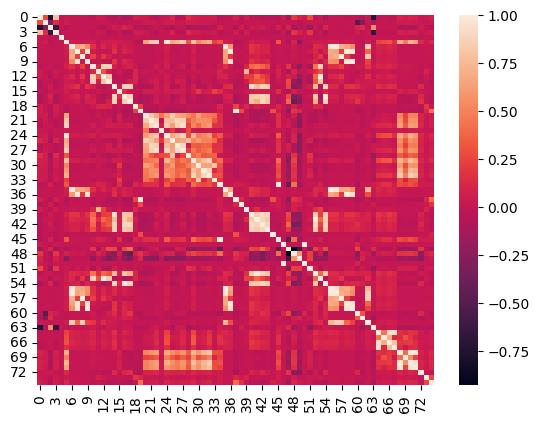

In [ ]:
sns.heatmap(scaled_data.corr())

## When applying PCA to a dataset, one golden rule always exists , Select the best number of principal components while keeping as much of the variance in the original data as possible.

Method 3: Plot the explained variance percentage of individual components and the percentage of total variance captured by all principal components.
This is the most advanced and effective method that can be used to select the best number of principal components for the dataset.

In this method, we create the following type of plot.

In this method, we create the following type of plot.


The percentage of total variance captured by the principal components (Image by author)
The number of bars is equal to the number of variables in the original dataset. In this plot, each bar shows the explained variance percentage of individual components and the step plot shows the cumulative explained variance percentages.

By looking at this plot, we can easily decide how many components should be kept. In this example, only the first two components capture almost all the variance in the dataset. So, we decide to select only the first two components.

To get the Python code for creating the above type of plot, please refer to the 15th Question of my “Principal Component Analysis — 18 Questions Answered” article.

According to Kaiser’s rule, all the components with eigenvalues greater than 1 should be kept for statistical inference. The reasoning behind Kaiser’s rule is that any principal component retained should explain the variance at least as much as an original standardized variable. 

In [ ]:
## Select the ideal number of componnets
import numpy as np

pca = PCA(n_components=18)
 
pca.fit_transform(scaled_data)

prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

print("variance in %",(prop_var*100))
print("Sum is",np.sum(prop_var))
print("type", type(prop_var))
print("eigenvalues",eigenvalues)

eigenvalues = pca.explained_variance_
prop_var = eigenvalues / np.sum(eigenvalues)
print(prop_var*100)
print(np.sum(prop_var))
                             
                                


variance in % [15.06047335 12.84287048  9.81121216  5.65893088  5.14207858  4.44379085
  3.73212861  3.54955169  3.15767147  2.69456388  2.41957348  2.32926591
  2.29419167  2.09651279  2.06479637  1.70621451  1.470927    1.45105231]
Sum is 0.8192580599729546
type <class 'numpy.ndarray'>
eigenvalues [11.29538054  9.63217463  7.35842575  4.24420775  3.85656765  3.33285067
  2.79910278  2.66216979  2.36825896  2.02092748  1.81468421  1.74695338
  1.72064764  1.57238814  1.54860078  1.27966378  1.10319774  1.08829169]
[18.38306401 15.67622109 11.97572857  6.90738506  6.27650655  5.42416495
  4.55549819  4.33264177  3.85430626  3.28902944  2.95337159  2.84314067
  2.80032846  2.55903834  2.52032476  2.08263378  1.79543793  1.77117856]
1.0


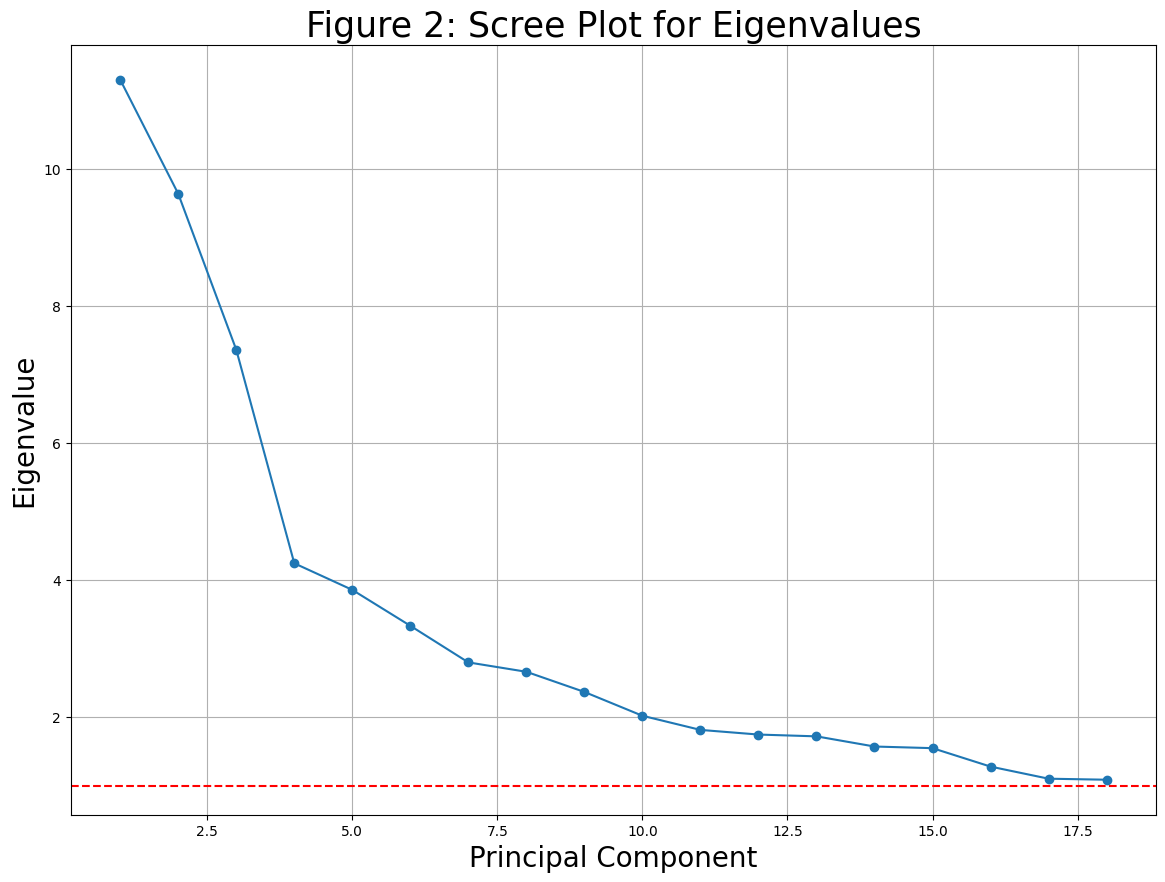

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
plt.plot(np.arange(1, len(eigenvalues)+1), 
         eigenvalues, marker='o')
plt.xlabel('Principal Component',
           size = 20)
plt.ylabel('Eigenvalue',
           size = 20)
plt.title('Figure 2: Scree Plot for Eigenvalues',
          size = 25)
plt.axhline(y=1, color='r', 
            linestyle='--')
plt.grid(True)

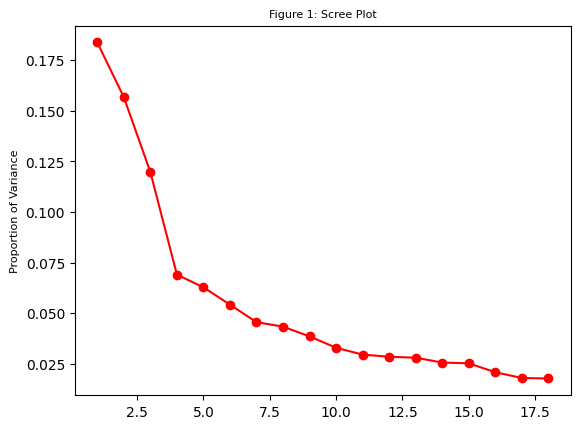

In [ ]:
## 18 have eigen value greater than 1 and covers variance.  We will choose 18 as the ideal number of Principal components for our Analysis
import matplotlib.pyplot as plt
import plotly.graph_objects as go
PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

In [ ]:
# We choose 18 components and do the PCA on them
pca = PCA(n_components = 18)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,-1.901801,0.199577,-0.548426,0.858527,0.194387,1.207041,0.287638,0.974396,0.112887,-0.241852,-0.528976,0.547790,0.595722,-0.043967,1.332749,0.262118,0.125351,0.163252
1,-1.738461,-0.019706,0.186335,-2.930928,0.539952,0.924702,-1.496537,0.557958,-0.455876,-0.087209,-0.643031,0.327935,-0.270688,-0.837991,-0.711473,-0.315504,0.072998,0.021946
2,-1.858123,0.670167,-0.948411,0.716724,0.234968,1.306600,0.233535,0.964987,0.127563,-0.228075,-0.657953,0.743649,0.714779,-0.152928,1.773937,0.545791,0.030161,0.184619
3,-1.859435,0.716699,-1.008179,0.822347,0.210741,1.316327,0.291172,0.960124,0.133257,-0.227669,-0.656819,0.751976,0.738702,-0.149894,1.843690,0.572429,0.017525,0.184614
4,-2.008487,-1.663800,1.523390,-0.047453,-2.097741,-0.020495,0.175069,-1.263915,3.748034,-0.005014,-0.445370,0.737449,-0.271506,-0.199933,0.051096,-0.478762,-0.595918,-0.821494


<Axes: >

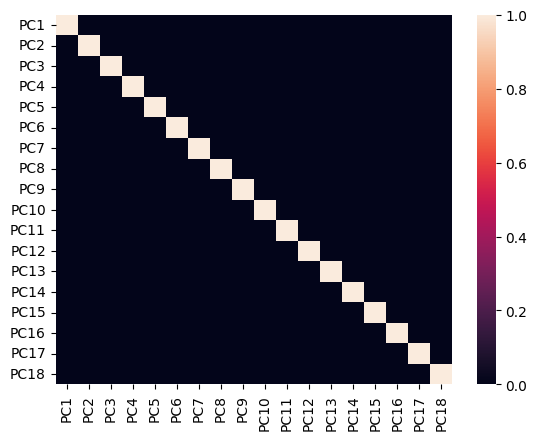

In [ ]:
sns.heatmap(data_pca.corr())

In [ ]:
x = data_pca.iloc[:,0:17] # 1t for rows and second for columns
x


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-1.901801,0.199577,-0.548426,0.858527,0.194387,1.207041,0.287638,0.974396,0.112887,-0.241852,-0.528976,0.547790,0.595722,-0.043967,1.332749,0.262118,0.125351
1,-1.738461,-0.019706,0.186335,-2.930928,0.539952,0.924702,-1.496537,0.557958,-0.455876,-0.087209,-0.643031,0.327935,-0.270688,-0.837991,-0.711473,-0.315504,0.072998
2,-1.858123,0.670167,-0.948411,0.716724,0.234968,1.306600,0.233535,0.964987,0.127563,-0.228075,-0.657953,0.743649,0.714779,-0.152928,1.773937,0.545791,0.030161
3,-1.859435,0.716699,-1.008179,0.822347,0.210741,1.316327,0.291172,0.960124,0.133257,-0.227669,-0.656819,0.751976,0.738702,-0.149894,1.843690,0.572429,0.017525
4,-2.008487,-1.663800,1.523390,-0.047453,-2.097741,-0.020495,0.175069,-1.263915,3.748034,-0.005014,-0.445370,0.737449,-0.271506,-0.199933,0.051096,-0.478762,-0.595918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442478,3.932527,0.312532,-0.074227,-2.709726,-0.328727,-1.202795,-0.936867,-0.107171,-0.882788,0.019035,-1.064774,-1.560209,-1.410571,1.382667,-3.242471,-1.030839,-0.905739
442479,0.286940,0.121249,-0.145473,-1.778668,1.330987,-0.034277,-1.129680,-0.280734,0.277423,-0.202620,0.657937,-1.665099,-0.147850,0.003250,-2.623087,-0.490687,0.522444
442480,0.608971,0.069584,-0.235356,-1.664439,1.699711,0.133257,-1.178882,-0.275975,0.418999,-0.272595,0.893170,-1.659032,0.124335,-0.154376,-2.642919,-0.613631,0.419874
442481,0.470771,0.444487,-0.494914,-1.760115,1.413082,0.168010,-1.173843,-0.302949,0.270764,-0.275891,0.800253,-1.728714,0.110952,-0.046391,-2.766491,-0.550684,0.459896


# Check the ideal K
We will Use K values from 4 to 9 to get the ideal value of K in this algorithm

In [ ]:
# 4 and 5, 6 7, 8
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
X=x

import pandas as pd
from sklearn.mixture import GaussianMixture


# Instantiate and fit the Gaussian Mixture model
gmm = GaussianMixture(n_components=4)
gmm.fit(X)

# Get the cluster labels for each sample
labels = gmm.predict(X)

# Add the cluster labels to the DataFrame
mydata['Cluster'] = labels




labels_4 = labels
print(metrics.silhouette_score(X, labels_4, metric = 'euclidean',sample_size=50000))
print(metrics.calinski_harabasz_score(X, labels_4))

from sklearn.metrics import davies_bouldin_score
DB = davies_bouldin_score(X, labels_4)
print(DB)

0.05182542990260437
22660.517608144342
2.7760212660093257


In [ ]:
type(X)

pandas.core.frame.DataFrame

[2 2 2 ... 0 0 0]


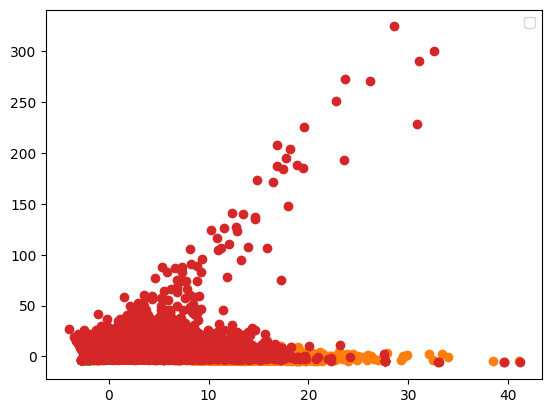

In [ ]:
kmeans_label = labels
df = X
print(kmeans_label)
u_labels = np.unique(kmeans_label)
 
#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[kmeans_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

In [ ]:
print("4 is the Ideal Cluster number")
import collections, numpy
overall_counter = collections.Counter(labels_4)

## Check How the Clusters are divided 
print(overall_counter)

4 is the Ideal Cluster number
Counter({1: 155188, 0: 146372, 2: 107548, 3: 33375})


In [ ]:
## Analysis
 
print("Cluster Distribution")

print("cluster 0 % elements",317254*100/len(mydata))
print("cluster 1 % elements",64309*100/len(mydata))
print("cluster 2 % elements",60879*100/len(mydata))
print("cluster 3 % elements",41*100/len(mydata))

Cluster Distribution
cluster 0 % elements 71.6985737305162
cluster 1 % elements 14.533665700151193
cluster 2 % elements 13.758494676631644
cluster 3 % elements 0.009265892700962524


First 3 clusters only explains all the variations. We will treat Cluster 3 as Outliers and check what exactly it has
Before that Some analysis on the Original Data Set only.
Note that we have merged the Dataset based on Flow ID. Thereby multiple rows are merged to one

In [ ]:
## Top Sessions by L7 Protocol
print("Sessions by L7 Protocol")
overall_data_countrer_l7 = collections.Counter(mydata['L7Protocol'])
print(overall_data_countrer_l7)

Sessions by L7 Protocol
Counter({126.0: 105340, 91.0: 67033, 7.0: 58771, 131.0: 44478, 130.0: 25315, 124.0: 21629, 212.0: 10882, 178.0: 8399, 68.5: 8283, 69.0: 6217, 66.5: 6090, 147.0: 5727, 37.75: 4668, 70.0: 3688, 125.0: 3572, 38.0: 3099, 119.0: 3037, 36.75: 2975, 122.0: 2930, 120.0: 2494, 68.0: 2423, 220.0: 2256, 65.5: 1846, 48.0: 1763, 86.33333333333333: 1678, 121.0: 1674, 89.0: 1660, 48.333333333333336: 1481, 78.4: 1481, 46.666666666666664: 1409, 109.5: 1112, 40.0: 1021, 140.0: 964, 36.25: 958, 89.66666666666667: 919, 96.25: 783, 77.0: 773, 56.2: 744, 219.0: 725, 211.0: 614, 80.8: 613, 54.6: 608, 53.666666666666664: 582, 38.5: 558, 99.25: 532, 221.0: 447, 139.0: 412, 58.25: 408, 31.6: 399, 100.0: 369, 42.0: 355, 46.0: 354, 64.0: 344, 133.0: 344, 56.6: 339, 85.0: 335, 142.0: 333, 102.2: 321, 22.75: 307, 75.33333333333333: 306, 176.0: 290, 128.5: 283, 77.28571428571429: 279, 81.4: 277, 58.0: 258, 143.0: 253, 66.0: 253, 92.5: 248, 75.0: 227, 92.0: 216, 179.0: 210, 63.5: 206, 136.3333

In [ ]:
## Top Entries by Client IP
print("Session entries by Source IP")
overall_data_countrer_sip = collections.Counter(mydata['Source.IP'])
print(overall_data_countrer_sip)

Session entries by Source IP
Counter({180881369.0: 44674, 180881351.0: 39480, 180881347.0: 38069, 180881370.0: 37477, 180881346.0: 36596, 180881348.0: 33349, 180881159.0: 5086, 3232281614.0: 4465, 3232254040.0: 3361, 180881157.0: 3014, 3232258674.0: 2722, 3232258625.0: 2572, 3232253995.0: 2571, 3232238145.0: 2244, 3232281637.0: 2045, 180881160.0: 1967, 180881161.0: 1866, 3232253983.0: 1601, 3232245798.0: 1521, 3232238117.0: 1518, 180881158.0: 1500, 180881156.0: 1499, 2886926637.0: 1454, 3232281616.0: 1436, 2886926628.0: 1413, 3232238160.0: 1407, 2886926622.0: 1310, 3232254003.0: 1279, 3232238119.0: 1257, 3232274184.0: 1248, 182845752.0: 1182, 3232245802.0: 1170, 3232264206.0: 1140, 182845769.0: 1131, 3232281652.0: 1097, 3232268841.0: 1091, 3232246385.0: 1086, 3232258570.0: 1075, 3232274185.0: 1037, 3232256281.0: 1012, 3232258698.0: 971, 2886926627.0: 927, 3232245790.0: 926, 3232242985.0: 922, 3232268802.0: 903, 3232258590.0: 887, 3232248858.0: 872, 3232269075.0: 857, 3232246334.0: 857,

In [ ]:
# Top Entries my Destination IP
print("Session entries by Destination IP")
overall_data_countrer_dip = collections.Counter(mydata['Destination.IP'])
print(overall_data_countrer_dip)

Session entries by Destination IP
Counter({180881160.0: 35746, 180881157.0: 35205, 180881159.0: 34224, 180881156.0: 32976, 180881161.0: 31759, 180881158.0: 27756, 3488895158.0: 8282, 3003188434.0: 5374, 1750834412.0: 5358, 3003188455.0: 5070, 3003188468.0: 5049, 3003188440.0: 5016, 3003188461.0: 4850, 3003188454.0: 4820, 3003188441.0: 4770, 3003188475.0: 4743, 3003188469.0: 4701, 3003188462.0: 4673, 3003188448.0: 4544, 3003188447.0: 4537, 3232281637.0: 2757, 2899909953.0: 1837, 3627731682.0: 1648, 3627731681.0: 1561, 2899910146.0: 1466, 643490315.0: 1382, 3627736642.0: 1255, 2899910145.0: 1240, 225117234.0: 1223, 2899909922.0: 1204, 1089059517.0: 1113, 169084084.0: 1082, 643490316.0: 1069, 3589263173.0: 1065, 3627736674.0: 1015, 2899909954.0: 991, 225126923.0: 957, 643490317.0: 955, 3232274178.0: 947, 3232291845.0: 942, 1089060541.0: 932, 3627736673.0: 912, 1611073902.0: 865, 386478863.0: 833, 3627731690.0: 822, 2899910154.0: 743, 1168955503.0: 713, 3627736641.0: 672, 392336990.0: 640,

Create additional column for Volume in Bytes and Packets. These are useful as most sampled solutions provide this data

In [ ]:
mydata['Cluster'] = labels

label0_df_gauss = mydata.loc[mydata['Cluster'] == 0]
label0_df_gauss

label1_df_gauss = mydata.loc[mydata['Cluster'] == 1]
label1_df_gauss

label2_df_gauss = mydata.loc[mydata['Cluster'] == 2]
label2_df_gauss

label3_df_gauss = mydata.loc[mydata['Cluster'] == 3]
label3_df_gauss




print(len(label0_df_gauss))
print(len(label1_df_gauss))
print(len(label2_df_gauss))
print(len(label3_df_gauss))

146372
155188
107548
33375


## Calculation of weights of each column in the Cluster

THis will be repeated for all Clusters

This approach is model-agnostic; Not exclusive to K-Means, in which we convert the unsupervised clustering problem into a One-vs-All supervised classification problem using an easily interpretable classifier such as tree-based models. The steps to do this are as follows:

Change the cluster labels into One-vs-All binary labels for each
Train a classifier to discriminate between each cluster and all other clusters
Extract the feature importances from the model (We will be using sklearn.ensemble.RandomForestClassifier)

In [ ]:
mydata['Cluster']
mydata['Binary Cluster 0'] = mydata['Cluster'].map({0:0, 1:0, 2:1,3:0})
## Check what factor prompted Cluster 2 
## Cluster 1 2 and 3 are marked as 0 and 2 only as 1. We will repeat this step for other clusters as well

print("\n", mydata["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
#clf.fit(mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

#clf.fit(mydata[['Source.IP', 'L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

mylist = list(mydata.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('Cluster')

clf.fit(mydata[mylist].values, mydata["Binary Cluster 0"].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse 

print(sorted_feature_weight_idxes)
print(clf.feature_importances_)

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))



 0    334935
1    107548
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count',

[('Destination.Port', 0.1197910291765558),
 ('Destination.IP', 0.11758253423424975),
 ('Source.IP', 0.101796072883326),
 ('min_seg_size_forward', 0.03742323935455119),
 ('Bwd.IAT.Total', 0.029601266192350373),
 ('Fwd.Header.Length', 0.02922579826367431),
 ('Fwd.Header.Length.1', 0.02594828254278836),
 ('Source.Port', 0.02500877428087132),
 ('Flow.Duration', 0.024846827631038168),
 ('Bwd.IAT.Max', 0.02069809685707673),
 ('Active.Min', 0.02022739804293054),
 ('Idle.Min', 0.019373237233948806),
 ('volume_in_bytes_psec', 0.019356864335523815),
 ('Bwd.IAT.Std', 0.019240314663342195),
 ('Active.Max', 0.017873970998921268),
 ('Fwd.PSH.Flags', 0.017663750838435036),
 ('Subflow.Fwd.Packets', 0.017625844982213514),
 ('Idle.Max', 0.016903370983365935),
 ('Fwd.IAT.Total', 0.01659928304759027),
 ('Fwd.IAT.Max', 0.015279174826598556),
 ('Total.Fwd.Packets', 0.015112040972468783),
 ('SYN.Flag.Count', 0.01483907615626124),
 ('act_data_pkt_fwd', 0.011937657391451488),
 ('Flow.Bytes.s', 0.01190745677810

In [ ]:
## We will repeat this procedure for all the Clusters. Cluster 1

mydata['Binary Cluster 0'] = mydata['Cluster'].map({0:1, 1:0, 2:0,3:0})
print("\n", mydata["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(mydata.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('Cluster')

clf.fit(mydata[mylist].values, mydata["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))


 0    296111
1    146372
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count',

[('Source.IP', 0.10932858342895223),
 ('Destination.IP', 0.10481826150737607),
 ('Destination.Port', 0.10135283802225528),
 ('Flow.Packets.s', 0.035662992761174454),
 ('min_seg_size_forward', 0.033886601658616816),
 ('Bwd.IAT.Total', 0.03177452180554389),
 ('volume_in_bytes_psec', 0.031566666472170726),
 ('ACK.Flag.Count', 0.030554021377880988),
 ('Fwd.Packets.s', 0.02511684964690979),
 ('PSH.Flag.Count', 0.023142186900041918),
 ('Idle.Min', 0.022789268639274125),
 ('Idle.Max', 0.021667936710666864),
 ('Idle.Mean', 0.02078337427459407),
 ('Bwd.IAT.Std', 0.019347469050710317),
 ('Source.Port', 0.01852584547531464),
 ('Bwd.IAT.Max', 0.017457684752385287),
 ('Fwd.Packet.Length.Min', 0.016755377436277127),
 ('Flow.Duration', 0.01628454789439978),
 ('SYN.Flag.Count', 0.016058120187123007),
 ('Active.Max', 0.015713243316015712),
 ('Fwd.IAT.Total', 0.015601857303819418),
 ('Fwd.PSH.Flags', 0.015053341855249315),
 ('volume_in_packets_psec', 0.01387178015196158),
 ('Flow.IAT.Max', 0.01352072958

In [ ]:
## Cluster 2
mydata['Binary Cluster 0'] = mydata['Cluster'].map({0:0, 1:1, 2:0,3:0})
print("\n", mydata["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(mydata.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('Cluster')

clf.fit(mydata[mylist].values, mydata["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))


 0    287295
1    155188
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count',

[('Active.Max', 0.05085436060440489),
 ('Idle.Mean', 0.04402392306511562),
 ('Bwd.IAT.Mean', 0.039031123004150146),
 ('Bwd.IAT.Total', 0.034956978160744945),
 ('Flow.Packets.s', 0.03422735295196853),
 ('Idle.Min', 0.03268064982411836),
 ('SYN.Flag.Count', 0.03233115460208509),
 ('Bwd.IAT.Std', 0.030383817850086533),
 ('Fwd.PSH.Flags', 0.030159948118722815),
 ('Flow.IAT.Std', 0.028860157621719725),
 ('Fwd.IAT.Total', 0.02884759611783743),
 ('Active.Mean', 0.027756859733915853),
 ('Flow.IAT.Mean', 0.02552050847016825),
 ('Active.Min', 0.024574086987736745),
 ('volume_in_packets_psec', 0.0244174696041506),
 ('Flow.IAT.Max', 0.024318258293718937),
 ('Fwd.Packets.s', 0.024302258570080247),
 ('Flow.Duration', 0.02234785133632665),
 ('Idle.Max', 0.021519164704967616),
 ('FIN.Flag.Count', 0.02030456839165405),
 ('Bwd.IAT.Max', 0.020128277405502368),
 ('volume_in_bytes_psec', 0.01852823515947941),
 ('Fwd.IAT.Mean', 0.016076915154114954),
 ('Subflow.Bwd.Packets', 0.015966852810566468),
 ('Bwd.He

In [ ]:
## Cluster 3
mydata['Binary Cluster 0'] = mydata['Cluster'].map({0:0, 1:0, 2:0,3:1})
print("\n", mydata["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(mydata.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('Cluster')

clf.fit(mydata[mylist].values, mydata["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))


 0    409108
1     33375
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count',

[('Total.Fwd.Packets', 0.08288542352758511),
 ('Subflow.Fwd.Packets', 0.07359494048113084),
 ('Fwd.Header.Length.1', 0.06897410780152975),
 ('Bwd.Header.Length', 0.06171619654229718),
 ('Subflow.Bwd.Packets', 0.059400389544941055),
 ('Total.Backward.Packets', 0.04636301147707167),
 ('Fwd.Header.Length', 0.04110589743364474),
 ('Avg.Fwd.Segment.Size', 0.032904798229817865),
 ('Subflow.Bwd.Bytes', 0.03258093449330477),
 ('Fwd.Packet.Length.Mean', 0.032261562135402516),
 ('Total.Length.of.Bwd.Packets', 0.03034384981452841),
 ('Active.Max', 0.030290447617845797),
 ('Subflow.Fwd.Bytes', 0.02952296938211431),
 ('Fwd.Packet.Length.Min', 0.029189273073554334),
 ('Active.Mean', 0.02796962192915745),
 ('Flow.IAT.Min', 0.02759716422088703),
 ('Flow.Bytes.s', 0.02503312740007547),
 ('volume_in_bytes_psec', 0.0217100979068121),
 ('Active.Min', 0.02010706952913268),
 ('Total.Length.of.Fwd.Packets', 0.018945575821917252),
 ('act_data_pkt_fwd', 0.016011715143659653),
 ('RST.Flag.Count', 0.013696558997

In [ ]:
## 0 is the best cluster

##('Bwd.IAT.Total', 0.06484712635136297),
## ('Flow.Packets.s', 0.055140555331667444),
## ('Bwd.IAT.Max', 0.05389168650757747),
## ('volume_in_bytes_psec', 0.052130821225025284),
## ('Fwd.Packets.s', 0.05119367917918519),
## ('Bwd.IAT.Std', 0.045180188547193516),
## ('Bwd.IAT.Mean', 0.044961072583587273),

In [ ]:
#Lets do K-means on reduced datasets

newmydata_bytes = label1_df_gauss[['Flow.Duration', 'Packet.Length.Std','Fwd.IAT.Total', 'Max.Packet.Length','Packet.Length.Variance','Idle.Max','Average.Packet.Size','Bwd.IAT.Total','Flow.Packets.s','Bwd.IAT.Max','volume_in_bytes_psec','Fwd.Packets.s','Bwd.IAT.Std','Bwd.IAT.Mean']].copy()


In [ ]:
## Use Standard Scaler to Scale the Data
newmydata_bytes = label1_df_gauss[['Flow.Duration', 'Packet.Length.Std','Fwd.IAT.Total', 'Max.Packet.Length','Packet.Length.Variance','Idle.Max','Average.Packet.Size','Bwd.IAT.Total','Flow.Packets.s','Bwd.IAT.Max','volume_in_bytes_psec','Fwd.Packets.s','Bwd.IAT.Std','Bwd.IAT.Mean']].copy()
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(newmydata_bytes)) #scaling the data
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.945086,0.501141,-0.844238,0.152143,-0.099334,-0.756767,0.102674,-0.667653,-0.413382,-0.679946,-0.191158,-0.394130,-0.569153,-0.415874
1,-0.751720,0.814535,-0.651779,-0.056725,0.105525,-0.756767,0.660310,-0.780615,-0.413396,-0.798152,-0.191186,-0.394132,-0.687833,-0.471582
2,-1.045700,-0.256497,-0.944526,-0.429125,-0.330355,-0.756767,-0.253484,-0.780377,2.625154,-0.797993,-0.190269,2.756628,-0.687719,-0.471191
3,-0.215937,-0.263797,-0.944424,-0.415092,-0.329157,0.012420,0.044856,0.121136,1.612090,0.010920,2.130549,1.706022,0.108403,0.022574
4,-0.165077,0.085600,-0.944050,-0.221876,-0.227996,0.059378,0.476332,0.175964,-0.412909,0.060246,-0.157753,-0.393951,0.156909,0.052604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155183,-1.040931,-0.405194,-0.939635,-0.542104,-0.343478,-0.756767,-0.268371,-0.775969,1.683849,-0.795022,-0.191201,1.743329,-0.684918,-0.470234
155184,-1.039169,-0.281583,-0.937881,-0.426966,-0.344392,-0.756767,-0.236949,-0.775314,-0.109572,-0.795017,-0.191199,-0.236584,-0.683842,-0.469205
155185,-0.058894,-0.021172,0.037795,-0.237258,-0.173957,-0.756767,-0.141515,-0.777216,-0.265239,-0.792473,-0.191217,-0.355722,-0.680544,-0.468229
155186,0.867828,0.256286,0.960164,-0.023263,0.067837,0.847704,0.391380,0.258233,-0.395263,0.889137,-0.190776,-0.389433,-0.135330,-0.405046


In [ ]:
X1=scaled_data
# 4 and 5, 6 7, 8
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
X=scaled_data

import pandas as pd
from sklearn.mixture import GaussianMixture


# Instantiate and fit the Gaussian Mixture model
gmm = GaussianMixture(n_components=4)
gmm.fit(X1)

# Get the cluster labels for each sample
labels = gmm.predict(X1)

# Add the cluster labels to the DataFrame
newmydata_bytes['Cluster'] = labels

X = X1
labels_4 = labels

#labels_4 = gmm.labels_
print(metrics.silhouette_score(X, labels_4, metric = 'euclidean',sample_size=50000))
print(metrics.calinski_harabasz_score(X, labels_4))

from sklearn.metrics import davies_bouldin_score
DB = davies_bouldin_score(X, labels_4)
print(DB)



0.04962022475647218
17691.82326972361
2.313493451763392


We will use 4 as the ideal cluster size and would evaluate

[0 1 3 ... 1 0 1]


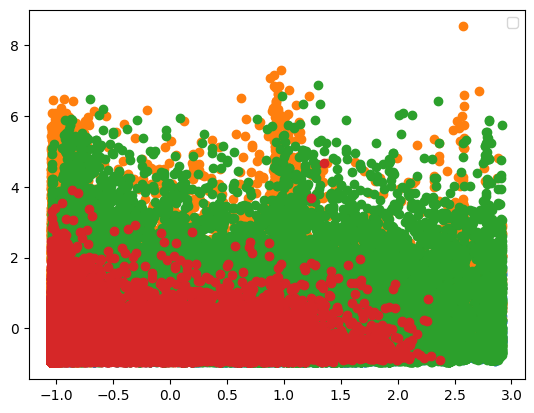

In [ ]:
kmeans_label = labels_4
df = X1
print(kmeans_label)
u_labels = np.unique(kmeans_label)
 
5#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[kmeans_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

In [ ]:
print("4 is the Ideal Cluster number")
import collections, numpy
overall_counter = collections.Counter(labels_4)

## Check How the Clusters are divided 
print(overall_counter)

4 is the Ideal Cluster number
Counter({0: 45932, 3: 37634, 1: 36716, 2: 34906})


In [ ]:
newmydata_bytes
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.945086,0.501141,-0.844238,0.152143,-0.099334,-0.756767,0.102674,-0.667653,-0.413382,-0.679946,-0.191158,-0.394130,-0.569153,-0.415874
1,-0.751720,0.814535,-0.651779,-0.056725,0.105525,-0.756767,0.660310,-0.780615,-0.413396,-0.798152,-0.191186,-0.394132,-0.687833,-0.471582
2,-1.045700,-0.256497,-0.944526,-0.429125,-0.330355,-0.756767,-0.253484,-0.780377,2.625154,-0.797993,-0.190269,2.756628,-0.687719,-0.471191
3,-0.215937,-0.263797,-0.944424,-0.415092,-0.329157,0.012420,0.044856,0.121136,1.612090,0.010920,2.130549,1.706022,0.108403,0.022574
4,-0.165077,0.085600,-0.944050,-0.221876,-0.227996,0.059378,0.476332,0.175964,-0.412909,0.060246,-0.157753,-0.393951,0.156909,0.052604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155183,-1.040931,-0.405194,-0.939635,-0.542104,-0.343478,-0.756767,-0.268371,-0.775969,1.683849,-0.795022,-0.191201,1.743329,-0.684918,-0.470234
155184,-1.039169,-0.281583,-0.937881,-0.426966,-0.344392,-0.756767,-0.236949,-0.775314,-0.109572,-0.795017,-0.191199,-0.236584,-0.683842,-0.469205
155185,-0.058894,-0.021172,0.037795,-0.237258,-0.173957,-0.756767,-0.141515,-0.777216,-0.265239,-0.792473,-0.191217,-0.355722,-0.680544,-0.468229
155186,0.867828,0.256286,0.960164,-0.023263,0.067837,0.847704,0.391380,0.258233,-0.395263,0.889137,-0.190776,-0.389433,-0.135330,-0.405046


In [ ]:
newmydata_bytes['Cluster'] = labels_4
newmydata_bytes['Binary Cluster 0'] = newmydata_bytes['Cluster'].map({0:1, 1:0, 2:0,3:0})
## Check what factor prompted Cluster 2 
## Cluster 1 2 and 3 are marked as 0 and 2 only as 1. We will repeat this step for other clusters as well

print("\n", newmydata_bytes["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
#clf.fit(mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

#clf.fit(mydata[['Source.IP', 'L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

mylist = list(newmydata_bytes.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('Cluster')

clf.fit(newmydata_bytes[mylist].values, newmydata_bytes["Binary Cluster 0"].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse 

print(sorted_feature_weight_idxes)
print(clf.feature_importances_)

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))



 0    109256
1     45932
Name: Binary Cluster 0, dtype: int64
['Flow.Duration', 'Packet.Length.Std', 'Fwd.IAT.Total', 'Max.Packet.Length', 'Packet.Length.Variance', 'Idle.Max', 'Average.Packet.Size', 'Bwd.IAT.Total', 'Flow.Packets.s', 'Bwd.IAT.Max', 'volume_in_bytes_psec', 'Fwd.Packets.s', 'Bwd.IAT.Std', 'Bwd.IAT.Mean', 'Cluster']
[13 11 10  5  8  4  9 12  7  3  6  0  2  1]
[0.03176263 0.02430548 0.03127053 0.04138224 0.07129313 0.09246196
 0.03756327 0.05294189 0.08541197 0.07070987 0.10277062 0.11739015
 0.07022338 0.17051287]


[('Bwd.IAT.Mean', 0.17051287497653272),
 ('Fwd.Packets.s', 0.11739014541913603),
 ('volume_in_bytes_psec', 0.10277062017774678),
 ('Idle.Max', 0.09246196007828306),
 ('Flow.Packets.s', 0.08541196998206342),
 ('Packet.Length.Variance', 0.07129313367127652),
 ('Bwd.IAT.Max', 0.07070986676929902),
 ('Bwd.IAT.Std', 0.07022337601198893),
 ('Bwd.IAT.Total', 0.052941886068054556),
 ('Max.Packet.Length', 0.04138224297460921),
 ('Average.Packet.Size', 0.037563270193092996),
 ('Flow.Duration', 0.031762633962430294),
 ('Fwd.IAT.Total', 0.031270534931079855),
 ('Packet.Length.Std', 0.02430548478440654)]

In [ ]:
newmydata_bytes['Cluster'] = labels_4
newmydata_bytes['Binary Cluster 0'] = newmydata_bytes['Cluster'].map({0:0, 1:1, 2:0,3:0})
## Check what factor prompted Cluster 2 
## Cluster 1 2 and 3 are marked as 0 and 2 only as 1. We will repeat this step for other clusters as well

print("\n", newmydata_bytes["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
#clf.fit(mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

#clf.fit(mydata[['Source.IP', 'L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

mylist = list(newmydata_bytes.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('Cluster')

clf.fit(newmydata_bytes[mylist].values, newmydata_bytes["Binary Cluster 0"].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse 

print(sorted_feature_weight_idxes)
print(clf.feature_importances_)

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))



 0    118472
1     36716
Name: Binary Cluster 0, dtype: int64
['Flow.Duration', 'Packet.Length.Std', 'Fwd.IAT.Total', 'Max.Packet.Length', 'Packet.Length.Variance', 'Idle.Max', 'Average.Packet.Size', 'Bwd.IAT.Total', 'Flow.Packets.s', 'Bwd.IAT.Max', 'volume_in_bytes_psec', 'Fwd.Packets.s', 'Bwd.IAT.Std', 'Bwd.IAT.Mean', 'Cluster']
[ 9  5  8  7 11 12 10 13  0  2  1  3  6  4]
[0.02274853 0.01268428 0.02086945 0.00904604 0.00605093 0.1546501
 0.00882045 0.12195044 0.14693878 0.17992665 0.06309904 0.10582301
 0.09260453 0.05478778]


[('Bwd.IAT.Max', 0.17992664671027164),
 ('Idle.Max', 0.15465009715183575),
 ('Flow.Packets.s', 0.14693877957249454),
 ('Bwd.IAT.Total', 0.12195043719704193),
 ('Fwd.Packets.s', 0.10582300887016545),
 ('Bwd.IAT.Std', 0.09260452607256336),
 ('volume_in_bytes_psec', 0.06309903607839612),
 ('Bwd.IAT.Mean', 0.05478778061718669),
 ('Flow.Duration', 0.022748528925480002),
 ('Fwd.IAT.Total', 0.020869452924839563),
 ('Packet.Length.Std', 0.012684282584462366),
 ('Max.Packet.Length', 0.009046044015804305),
 ('Average.Packet.Size', 0.008820451711932934),
 ('Packet.Length.Variance', 0.006050927567525354)]

In [ ]:
newmydata_bytes

,Flow.Duration,Packet.Length.Std,Fwd.IAT.Total,Max.Packet.Length,Packet.Length.Variance,Idle.Max,Average.Packet.Size,Bwd.IAT.Total,Flow.Packets.s,Bwd.IAT.Max,volume_in_bytes_psec,Fwd.Packets.s,Bwd.IAT.Std,Bwd.IAT.Mean,Cluster,Binary Cluster 0
41,3.053253e+06,528.070927,3053253.0,1773.000000,278858.904400,0.000000e+00,250.562500,3.046687e+06,5.240313e+00,1.895119e+06,4.009000e+06,1.637598e+00,6.619084e+05,3.046687e+05,0,0
64,8.907620e+06,641.133761,8907620.0,1386.000000,411052.500000,0.000000e+00,396.857143,0.000000e+00,7.858440e-01,0.000000e+00,2.778000e+06,7.858440e-01,0.000000e+00,0.000000e+00,1,1
81,7.049500e+03,254.737704,2639.0,696.000000,129782.596150,0.000000e+00,157.125000,6.409000e+03,1.000426e+06,2.548500e+03,4.321281e+07,1.000284e+06,6.350579e+02,2.136333e+03,3,0
119,2.512899e+07,252.104064,5726.0,722.000000,130555.997470,1.296813e+07,235.393939,2.432102e+07,6.668802e+05,1.297133e+07,1.023631e+11,6.667443e+05,4.440818e+06,2.702549e+06,3,0
155,2.666885e+07,378.156096,17108.5,1080.000000,195833.996205,1.375981e+07,348.590909,2.579978e+07,1.608420e+02,1.376215e+07,1.476770e+09,5.845986e+01,4.711352e+06,2.866785e+06,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442466,1.514303e+05,201.092360,151421.0,486.666667,121314.411133,0.000000e+00,153.219512,1.252960e+05,6.905063e+05,5.017833e+04,2.094134e+06,6.785883e+05,1.626094e+04,7.370353e+03,3,0
442468,2.047735e+05,245.687408,204768.5,700.000000,120724.605150,0.000000e+00,161.462963,1.429755e+05,1.000330e+05,5.026750e+04,2.179803e+06,5.001831e+04,2.226291e+04,1.299777e+04,3,0
442476,2.988363e+07,339.636017,29883612.0,1051.500000,230705.247900,0.000000e+00,186.500000,9.167950e+04,4.878061e+04,9.105200e+04,1.398751e+06,1.219520e+04,4.065179e+04,1.833800e+04,1,1
442478,5.794110e+07,439.734445,57940936.0,1448.000000,386732.764100,2.705063e+07,326.303846,2.801865e+07,5.970710e+03,2.705124e+07,2.084781e+07,1.492762e+03,3.081455e+06,3.638868e+05,0,0


In [ ]:
newmydata_bytes['Cluster'] = labels_4
newmydata_bytes['Binary Cluster 0'] = newmydata_bytes['Cluster'].map({0:0, 1:0, 2:1,3:0})
## Check what factor prompted Cluster 2 
## Cluster 1 2 and 3 are marked as 0 and 2 only as 1. We will repeat this step for other clusters as well

print("\n", newmydata_bytes["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
#clf.fit(mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

#clf.fit(mydata[['Source.IP', 'L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

mylist = list(newmydata_bytes.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('Cluster')

clf.fit(newmydata_bytes[mylist].values, newmydata_bytes["Binary Cluster 0"].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse 

print(sorted_feature_weight_idxes)
print(clf.feature_importances_)

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))



 0    120282
1     34906
Name: Binary Cluster 0, dtype: int64
['Flow.Duration', 'Packet.Length.Std', 'Fwd.IAT.Total', 'Max.Packet.Length', 'Packet.Length.Variance', 'Idle.Max', 'Average.Packet.Size', 'Bwd.IAT.Total', 'Flow.Packets.s', 'Bwd.IAT.Max', 'volume_in_bytes_psec', 'Fwd.Packets.s', 'Bwd.IAT.Std', 'Bwd.IAT.Mean', 'Cluster']
[13  7  9 10  8  4 11  5  3 12  1  2  6  0]
[0.02845375 0.03963796 0.03717055 0.04849797 0.06415399 0.0556261
 0.0356849  0.10796292 0.06959152 0.10292746 0.10223012 0.05942053
 0.04814314 0.20049909]


[('Bwd.IAT.Mean', 0.20049909175245662),
 ('Bwd.IAT.Total', 0.10796292000411127),
 ('Bwd.IAT.Max', 0.10292746266981988),
 ('volume_in_bytes_psec', 0.10223011949807756),
 ('Flow.Packets.s', 0.06959152087011028),
 ('Packet.Length.Variance', 0.06415399200248982),
 ('Fwd.Packets.s', 0.05942052757108601),
 ('Idle.Max', 0.055626099005260415),
 ('Max.Packet.Length', 0.048497968171193284),
 ('Bwd.IAT.Std', 0.04814313630733644),
 ('Packet.Length.Std', 0.039637964333352114),
 ('Fwd.IAT.Total', 0.037170546078201895),
 ('Average.Packet.Size', 0.03568490374955729),
 ('Flow.Duration', 0.028453747986947144)]

In [ ]:
newmydata_bytes['Cluster'] = labels_4
newmydata_bytes['Binary Cluster 0'] = newmydata_bytes['Cluster'].map({0:0, 1:0, 2:0,3:1})
## Check what factor prompted Cluster 2 
## Cluster 1 2 and 3 are marked as 0 and 2 only as 1. We will repeat this step for other clusters as well

print("\n", newmydata_bytes["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
#clf.fit(mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

#clf.fit(mydata[['Source.IP', 'L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

mylist = list(newmydata_bytes.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('Cluster')

clf.fit(newmydata_bytes[mylist].values, newmydata_bytes["Binary Cluster 0"].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse 

print(sorted_feature_weight_idxes)
print(clf.feature_importances_)

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))



 0    117554
1     37634
Name: Binary Cluster 0, dtype: int64
['Flow.Duration', 'Packet.Length.Std', 'Fwd.IAT.Total', 'Max.Packet.Length', 'Packet.Length.Variance', 'Idle.Max', 'Average.Packet.Size', 'Bwd.IAT.Total', 'Flow.Packets.s', 'Bwd.IAT.Max', 'volume_in_bytes_psec', 'Fwd.Packets.s', 'Bwd.IAT.Std', 'Bwd.IAT.Mean', 'Cluster']
[11  8 10  0  9  2 12  5  7 13  1  3  4  6]
[0.02729592 0.00870333 0.01657248 0.00646139 0.00559374 0.01209151
 0.0045434  0.01131857 0.35682915 0.01946859 0.13619733 0.37120551
 0.01285207 0.01086702]


[('Fwd.Packets.s', 0.3712055082316606),
 ('Flow.Packets.s', 0.35682914718226905),
 ('volume_in_bytes_psec', 0.13619733135618475),
 ('Flow.Duration', 0.027295915808802976),
 ('Bwd.IAT.Max', 0.01946858801071016),
 ('Fwd.IAT.Total', 0.016572475533322615),
 ('Bwd.IAT.Std', 0.012852067720779802),
 ('Idle.Max', 0.012091508358958912),
 ('Bwd.IAT.Total', 0.011318569230309826),
 ('Bwd.IAT.Mean', 0.010867021031593553),
 ('Packet.Length.Std', 0.008703334054975418),
 ('Max.Packet.Length', 0.006461392829033929),
 ('Packet.Length.Variance', 0.005593737752403096),
 ('Average.Packet.Size', 0.004543402898995309)]